In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import unicodedata
import re
import env 
import nltk.sentiment

## Exercises
### Do your work for this exercise in a file named explore.

### 1. Spam Data

### a) Load the spam data set.

In [4]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [5]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [6]:
# acquire data from spam_db

#connection set ip
def conn(db, user=env.username, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

url = conn("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()


,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape

(5572, 2)

### b) Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [17]:
# we can do that process with a join on a Series and not just a list
# we will do that for ham words, spam words, and all words
# we will pass our basic cleaning on top of that
ham_words = clean(' '.join(df[df.label == 'ham']['text']))
spam_words = clean(' '.join(df[df.label == 'spam']['text']))
all_words = clean(' '.join(df['text']))

In [18]:
# let's get some insights on word frequency by taking our words back apart
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [19]:
ham_freq.head()

im      449
get     314
go      273
ok      272
dont    257
dtype: int64

In [20]:
spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [21]:
# lets join these words together into a dataframe based 
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['ham','spam','all']
word_counts.head()

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279


In [26]:
# sort by 'all'
word_counts.sort_values('all', ascending=False)

,ham,spam,all
call,241,359,600
im,449,13,462
get,314,83,397
ur,240,144,384
go,273,31,304
...,...,...,...
edition,1,0,1
algorithm,1,0,1
textbook,1,0,1
3230,1,0,1


In [27]:
# sort by 'ham' and 'spam' columns
word_counts.sort_values(['ham','spam', 'all'], ascending=False)

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279
...,...,...,...
resub,0,1,1
expired,0,1,1
9153,0,1,1
okmail,0,1,1


## Visualization

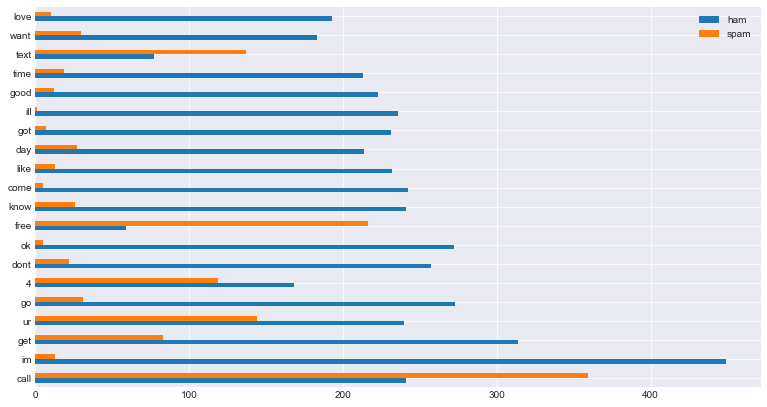

In [29]:
# plt.rc('font', size=18)
word_counts.sort_values(
    'all', ascending=False
)[['ham','spam']].head(20).plot.barh()
plt.show()

Text(0.5, 1.0, '% of spam vs ham for the most common 20 words')

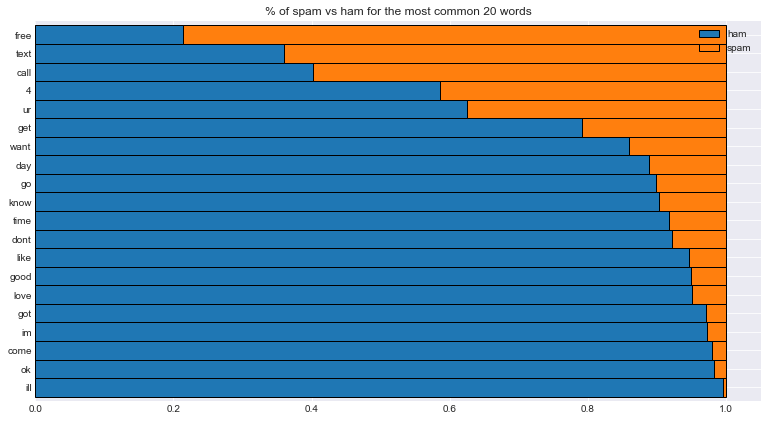

In [24]:
word_counts.sort_values("all", ascending = False)\
.head(20)\
.apply(lambda row:row/row["all"], axis = 1)\
.drop(columns = "all")\
.sort_values("spam")\
.plot.barh(stacked = True, width = 1, ec = "k", legend = True)
plt.title('% of spam vs ham for the most common 20 words')

## Bigrams

In [30]:
# create bigrams for ham and spam words
ham_biogram = pd.Series(nltk.ngrams(ham_words,2)).value_counts().head(20)
spam_biogram = pd.Series(nltk.ngrams(spam_words,2)).value_counts().head(20)

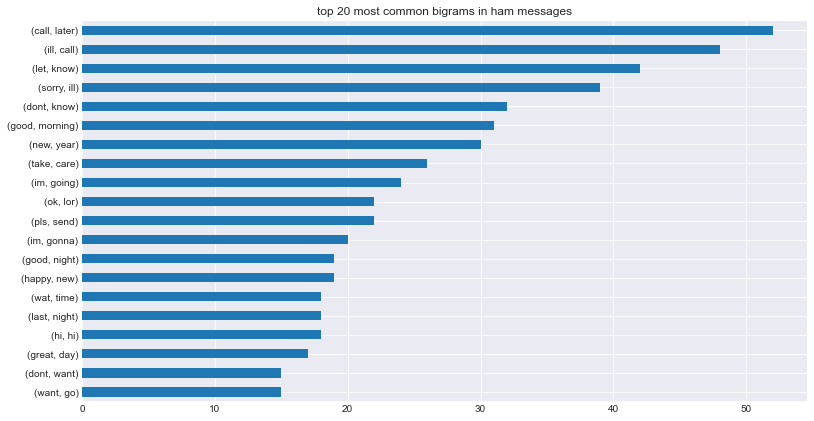

In [31]:
ham_biogram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common bigrams in ham messages')
plt.show()

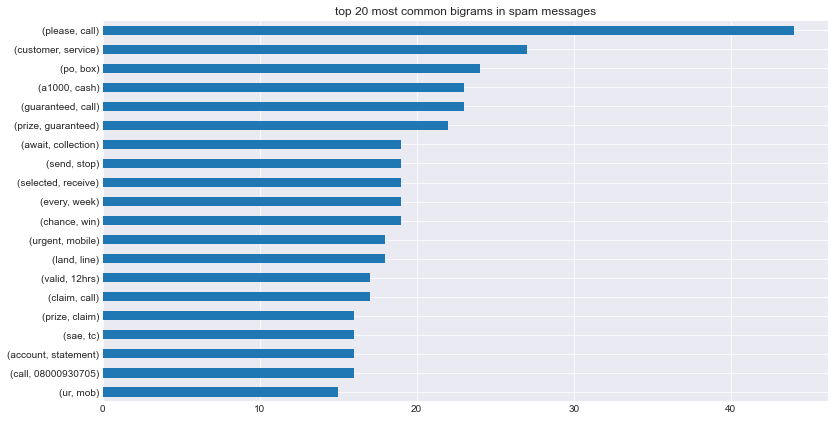

In [32]:
spam_biogram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common bigrams in spam messages')
plt.show()

In [33]:
#let's check if there are bigrams that are common in both
all_biogram = pd.Series(nltk.ngrams(all_words,2)).value_counts().head(20)

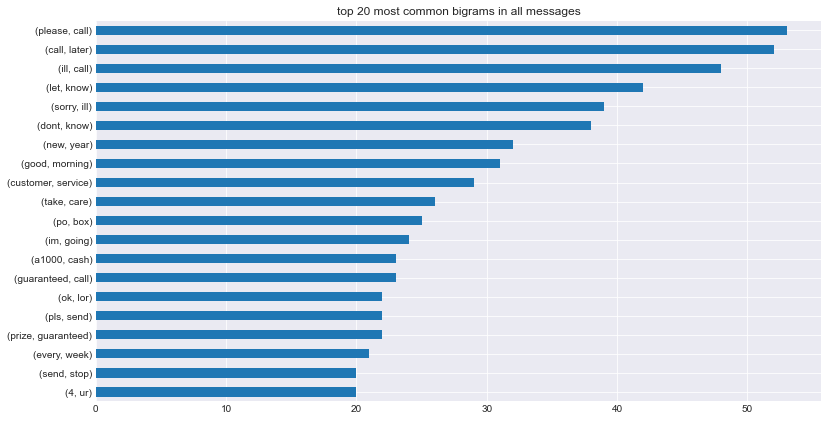

In [34]:
all_biogram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common bigrams in all messages')
plt.show()

In [36]:
from wordcloud import WordCloud

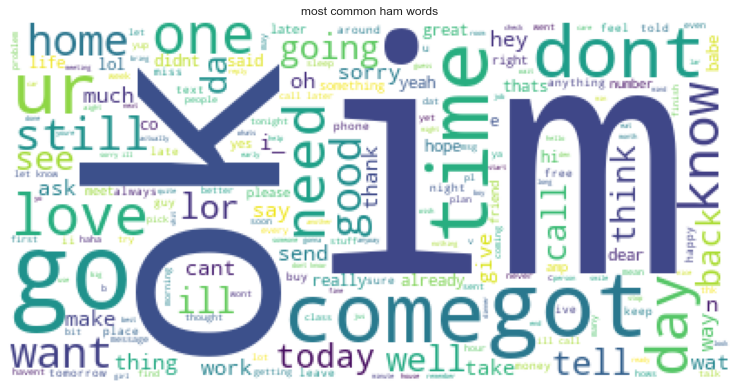

In [37]:
#word cloud for Ham words
img = WordCloud(background_color='white'
               ).generate(' '.join(ham_words))
plt.imshow(img)
plt.axis('off')
plt.title('most common ham words')
plt.show()

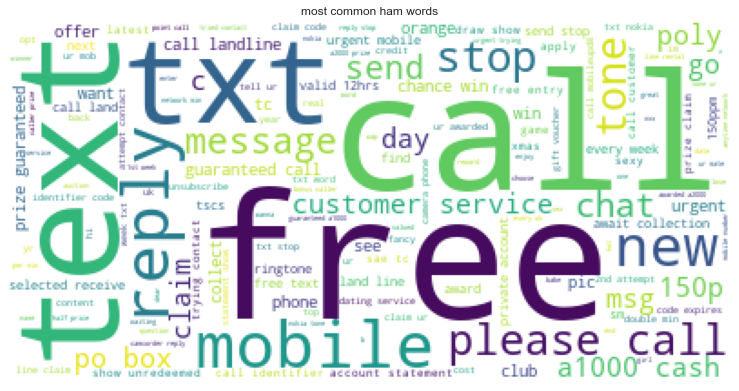

In [38]:
#word cloud for spam words
img = WordCloud(background_color='white'
               ).generate(' '.join(spam_words))
plt.imshow(img)
plt.axis('off')
plt.title('most common ham words')
plt.show()

In [39]:
#make trigrams
ham_trigram = pd.Series(nltk.ngrams(ham_words,3)).value_counts().head(20)
spam_trigram = pd.Series(nltk.ngrams(spam_words,3)).value_counts().head(20)

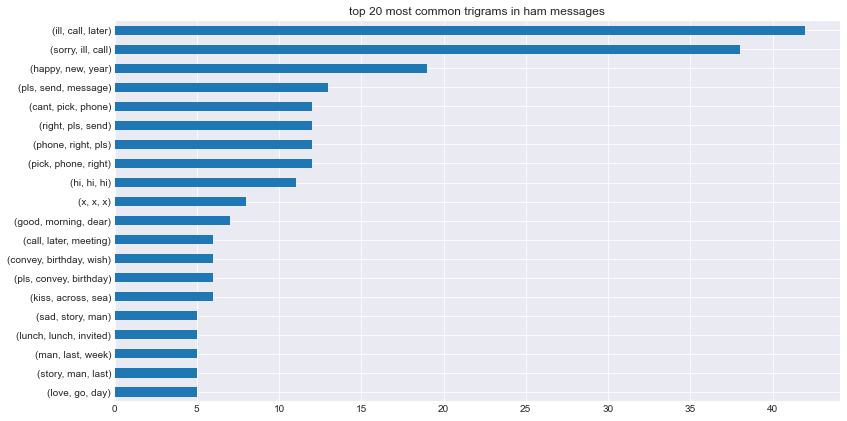

In [40]:
ham_trigram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common trigrams in ham messages')
plt.show()

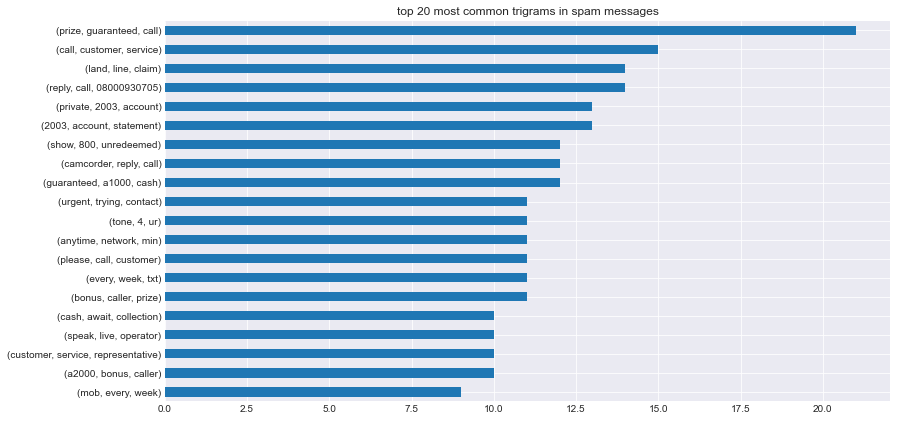

In [41]:
spam_trigram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common trigrams in spam messages')
plt.show()